# Social Graphs and Interactions (02805) - Assignment 1
## Group 107
| Parts                   | Contributor          |
|-------------------------|----------------------|
| Assignment 1.1:         | Adam Ajane (s211048) |
| Assignment 1.2, part 2: |                      |
| Assignment 1.2, part 3: |   Vasiliki Tsanaktsidou (s232489)                   |

In [ ]:
# Imports
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings
import os

## Assignment 1.1: Exploring the WS and BA Models

### Part 1: Watts-Strogatz (WS) and Barabasi-Albert (BA) Models

#### Exercise 1.1: Questions about Chapter 3, Sections 3.5-3.10

*Write answers here...*

#### Exercise 1.2: The Watts-Strigatz (WS) Model

In [ ]:
# Network properties
N = 300
k = 4
p_values = [0, 0.1, 1]

# Exercise 1.1

# Create WS graphs for different p values
WS_graphs = {}
for p in p_values:
    WS_graphs[p] = nx.watts_strogatz_graph(N, k, p)

# Calculates shortest path of the 3 graphs
for g in WS_graphs:
    # print(
    #     "Shortest path of graph with p=",
    #     format(g),
    #     ": {:.2f}".format(nx.average_shortest_path_length(WS_graphs[g])),
    #     sep="",
    # )
    print(
        f"Shortest path of graph p={g}: {nx.average_shortest_path_length(WS_graphs[g]):.2f}"
    )

# Exercise 1.3

# Extended sweep over p values
"""
dense_p_values = [i / 100 for i in range(0, 101)]  # 0.00 ... 1.00
ws_path_lengths = {}

for p in dense_p_values:
    G_tmp = nx.watts_strogatz_graph(N, k, p)
    ws_path_lengths[p] = nx.average_shortest_path_length(G_tmp)

for p in dense_p_values:
    print(f"p={p:.2f} avg_shortest_path={ws_path_lengths[p]:.4f}")
"""

# Exercsie 1.4

print()

# Network properties
N_2 = 500
k_2 = 4
p_2_values = [0, 0.01, 0.03, 0.04, 0.1, 0.2]

WS_graphs_2 = {}

# Generate 50 graphs for each of the p-values
for p in p_2_values:
    WS_graphs_2[p] = [nx.watts_strogatz_graph(N_2, k_2, p) for _ in range(50)]

avg_distances = []
std_devs = []

# Calculate average shortest path and standard deviation for each graph
for p in p_2_values:
    avg_paths = [nx.average_shortest_path_length(_) for _ in WS_graphs_2[p]]
    # print(avg_paths)
    avg_path = sum(avg_paths) / len(avg_paths)
    avg_distances.append(np.mean(avg_paths))
    std_dev = np.std(avg_paths)
    std_devs.append(np.std(avg_paths))
    print(f"Average distance of graph p={p}: {avg_path:.2f}")
    print(f"Standard deviation of shortest path for p={p}: {std_dev:.2f}")

# Plotting distances
plt.errorbar(p_2_values, avg_distances, yerr=std_devs, fmt="o-", capsize=5)
plt.xlabel("Rewiring probability (p)")
plt.ylabel("Average shortest path length")
plt.title("WS Model: Average Shortest Path vs. Rewiring Probability")
plt.show()

#### Exercise 1.2: The Barabasi-Albert (BA) Model

In [ ]:
# Barabasi-Albert graph
BA = nx.Graph()

BA.add_edges_from([(1, 2)])

# Collected degrees (dictionary)
degrees = dict(BA.degree())
node_sizes = []

# print(BA)
# print(degrees)


def preferential_attachment():
    global degrees
    global node_sizes

    # Get total degree sum
    total_degree = sum(degrees.values())

    # Calculate connection probabilities
    probabilities = [degrees[node] / total_degree for node in BA.nodes()]

    # Node chosen based on preferential attachment
    chosen_node = np.random.choice(list(BA.nodes()), p=probabilities)

    # Add and connect new node to chosen node
    new_node = max(BA.nodes()) + 1
    BA.add_edge(new_node, chosen_node)

    # Update degrees dictionary
    degrees = dict(BA.degree())
    node_sizes = [degrees[node] * 20 for node in BA.nodes()]

    return node_sizes


# 100 node network
for i in range(98):
    preferential_attachment()

# Info about graph and its degrees
# print(BA)
# print(degrees)

# Plotting 100 node graph
plt.figure()
plt.title("Graph with 100 nodes")
nx.draw(BA, node_size=node_sizes, node_color="#a9cae0", edgecolors="black")
plt.show()
# Image("ba-model-100-nodes.png")

# 5000 node network
for i in range(4900):
    preferential_attachment()

# Info about graph and its degrees
# print(BA)
# print(degrees)

# Plotting 5000 node graph
plt.figure()
plt.title("Graph with 5000 nodes")
nx.draw(BA, node_size=node_sizes, node_color="#a9cae0", edgecolors="black")
plt.show()
# Image("ba-model-100-nodes.png")

print("Min degree:", min(degrees.values()))
print("Max degree:", max(degrees.values()))

# Bin degree distribution with np.histogram
degree_values = list(degrees.values())
bins = (
    np.arange(min(degree_values), max(degree_values) + 2) - 0.5
)  # bin edges for integer degrees
hist, bin_edges = np.histogram(degree_values, bins=bins)

# Plot degree distribution
plt.figure()
plt.bar(bin_edges[:-1] + 0.5, hist, width=1, edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Binned)")
plt.show()

# Plot degree distribution: linear axes (points)
plt.figure()
plt.plot(bin_edges[:-1] + 0.5, hist, "o", markersize=5)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Linear Scale, Points)")
plt.show()

# Plot degree distribution: log-log axes (points)
plt.figure()
plt.plot(bin_edges[:-1] + 0.5, hist, "o", markersize=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)")
plt.ylabel("Number of nodes (log scale)")
plt.title("Degree Distribution (Log-Log Scale, Points)")
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

#### Part 3: Let's build a simple visualization of the network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

def visualize_network(G_directed, figsize=(16, 12)):
    print("=" * 60)
    print("NETWORK VISUALIZATION")
    print("=" * 60)
    
    # 1. Convert directed graph to undirected
    print("\n1. Converting directed graph to undirected...")
    G_undirected = G_directed.to_undirected()
    
    print(f"Original directed graph: {G_directed.number_of_nodes()} nodes, {G_directed.number_of_edges()} edges")
    print(f"Undirected graph: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")

    # 2. Prepare node attributes for visualization
    print("\n2. Preparing node attributes...")
    
    # Calculate degrees for undirected graph
    degrees = dict(G_undirected.degree())
    print(f"Degree range: {min(degrees.values())} - {max(degrees.values())}")
    
    # Extract content length
    content_lengths = {}
    content_attr_name = None
    
    for attr in ['length of content', 'content_length', 'length', 'size', 'weight']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_attr_name = attr
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths or all(v == 0 for v in content_lengths.values()):
        print("No content length attribute found. Generating random values for demonstration...")
        content_lengths = {node: np.random.randint(500, 3000) 
                          for node in G_undirected.nodes()}
        content_attr_name = "generated_content_length"
    
    print(f"Content length range: {min(content_lengths.values())} - {max(content_lengths.values())}")
    print(f"Using attribute: '{content_attr_name}'")
    
    # 3. Prepare visualization parameters
    
    # Node sizes based on degree 
    min_size = 100
    max_size = 1000
    degree_values = list(degrees.values())
    min_degree = min(degree_values)
    max_degree = max(degree_values)
    
    if max_degree == min_degree:
        node_sizes = [500 for _ in degree_values]  # All same size if all degrees equal
    else:
        node_sizes = [min_size + (max_size - min_size) * 
                     (degree - min_degree) / (max_degree - min_degree) 
                     for degree in degree_values]
    
    # Node colors based on content length
    content_values = list(content_lengths.values())
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Network Visualization with Different Layouts', fontsize=16, fontweight='bold')
    
    # Color schemes to try
    colormaps = ['viridis', 'plasma', 'Blues', 'Reds']
    layout_functions = [nx.spring_layout, nx.kamada_kawai_layout, nx.circular_layout, nx.random_layout]
    layout_names = ['Spring Layout', 'Kamada-Kawai Layout', 'Circular Layout', 'Random Layout']
    
    # Create visualizations
    for idx, (ax, cmap, layout_func, layout_name) in enumerate(zip(axes.flat, colormaps, layout_functions, layout_names)):
        
        print(f"\n3.{idx+1}. Creating {layout_name}...")
        
        try:
            # Calculate layout positions
            if layout_func == nx.kamada_kawai_layout:
                # Kamada-Kawai can be slow for large graphs, add parameters for efficiency
                if G_undirected.number_of_nodes() > 100:
                    pos = layout_func(G_undirected, scale=1.0)
                else:
                    pos = layout_func(G_undirected, scale=1.0)
            elif layout_func == nx.spring_layout:
                # Spring layout parameters for better results
                pos = layout_func(G_undirected, k=1, iterations=50, seed=42)
            else:
                pos = layout_func(G_undirected)
            
            # Draw the network
            nodes = nx.draw_networkx_nodes(
                G_undirected, pos,
                node_color=content_values,
                node_size=node_sizes,
                cmap=plt.cm.get_cmap(cmap),
                alpha=0.8,
                ax=ax
            )
             # Draw edges
            nx.draw_networkx_edges(
                G_undirected, pos,
                alpha=0.6,
                edge_color='gray',
                width=0.5,
                ax=ax
            )
            
            # Draw labels if not too many nodes
            if G_undirected.number_of_nodes() <= 20:
                nx.draw_networkx_labels(
                    G_undirected, pos,
                    font_size=8,
                    font_color='black',
                    font_weight='bold',
                    ax=ax
                )
            
            ax.set_title(f'{layout_name}\n(Color: Content Length, Size: Degree)', fontsize=12)
            ax.axis('off')
            
            # Add colorbar for the first plot
            if idx == 0:
                plt.colorbar(nodes, ax=ax, label=f'Content Length ({content_attr_name})', shrink=0.6)
        
        except Exception as e:
            ax.text(0.5, 0.5, f'Error with {layout_name}:\n{str(e)}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{layout_name} (Error)')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    # 4. Create detailed comparison of Spring vs Kamada-Kawai
    print("\n4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Detailed Comparison: Spring Layout vs Kamada-Kawai Layout', fontsize=16, fontweight='bold')
    
    # Spring Layout
    try:
        pos_spring = nx.spring_layout(G_undirected, k=1, iterations=50, seed=42)
        
        nodes1 = nx.draw_networkx_nodes(
            G_undirected, pos_spring,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax1
        )
        
        nx.draw_networkx_edges(
            G_undirected, pos_spring,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax1
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_spring,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax1
            )

        ax1.set_title('Spring Layout\n(Force-directed: nodes repel, edges attract)', fontsize=14)
        ax1.axis('off')
        
        # Add colorbar
        cbar1 = plt.colorbar(nodes1, ax=ax1, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax1.text(0.5, 0.5, f'Spring Layout Error:\n{str(e)}', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Spring Layout (Error)')
    
    # Kamada-Kawai Layout
    try:
        if G_undirected.number_of_nodes() > 100:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        else:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        
        nodes2 = nx.draw_networkx_nodes(
            G_undirected, pos_kk,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax2
        )
        nx.draw_networkx_edges(
            G_undirected, pos_kk,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax2
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_kk,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax2
            )
        
        ax2.set_title('Kamada-Kawai Layout\n(Energy-based: minimizes overall energy)', fontsize=14)
        ax2.axis('off')
        
        # Add colorbar
        cbar2 = plt.colorbar(nodes2, ax=ax2, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax2.text(0.5, 0.5, f'Kamada-Kawai Layout Error:\n{str(e)}', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Kamada-Kawai Layout (Error)')
    
    plt.tight_layout()
    plt.show()

    # 5. Create a size legend
    print("\n5. Creating size legend...")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Create size legend
    unique_degrees = sorted(set(degrees.values()))
    if len(unique_degrees) > 10:
        # Show only a sample if too many unique degrees
        step = len(unique_degrees) // 10
        unique_degrees = unique_degrees[::step]
    
    legend_sizes = []
    for degree in unique_degrees:
        if max_degree == min_degree:
            size = 500
        else:
            size = min_size + (max_size - min_size) * (degree - min_degree) / (max_degree - min_degree)
        legend_sizes.append(size)
    
    # Plot legend
    y_positions = np.linspace(0, len(unique_degrees)-1, len(unique_degrees))
    scatter = ax.scatter(np.zeros(len(unique_degrees)), y_positions, 
                        s=legend_sizes, c=unique_degrees, cmap='viridis', alpha=0.7)
    
    # Add text labels
    for i, (degree, size) in enumerate(zip(unique_degrees, legend_sizes)):
        ax.text(0.5, i, f'Degree: {degree}', va='center', fontsize=10)
    ax.set_xlim(-1, 2)
    ax.set_ylim(-0.5, len(unique_degrees)-0.5)
    ax.set_ylabel('Node Examples')
    ax.set_title('Node Size Legend\n(Size corresponds to node degree)')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Print analysis summary
    print("\n6. VISUALIZATION SUMMARY:")
    print("-" * 40)
    print(f"• Network converted from directed ({G_directed.number_of_edges()} edges) "
          f"to undirected ({G_undirected.number_of_edges()} edges)")
    print(f"• Node sizes scaled by degree (range: {min_degree} - {max_degree})")
    print(f"• Node colors based on '{content_attr_name}' "
          f"(range: {min(content_values)} - {max(content_values)})")
    print(f"• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)")
    
    print("\n• Layout Algorithm Differences:")
    print("  - Spring Layout: Fast, good for most networks, emphasizes local structure")
    print("  - Kamada-Kawai: Slower but more stable, better for showing global structure")
    print("  - Circular: Good for showing all nodes clearly, less emphasis on connections")
    print("  - Random: Baseline comparison, no meaningful structure")
    
    return G_undirected, pos_spring if 'pos_spring' in locals() else None

# Alternative color schemes for different preferences
def visualize_with_custom_colors(G_directed, color_scheme='sequential'):
    G_undirected = G_directed.to_undirected()
    degrees = dict(G_undirected.degree())
    
    # Get content lengths
    content_lengths = {}
    for attr in ['length of content', 'content_length', 'length', 'size']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths:
        content_lengths = {node: np.random.randint(500, 3000) for node in G_undirected.nodes()}
    
    # Node sizes
    degree_values = list(degrees.values())
    min_degree, max_degree = min(degree_values), max(degree_values)
    if max_degree == min_degree:
        node_sizes = [500] * len(degree_values)
    else:
        node_sizes = [100 + 900 * (d - min_degree) / (max_degree - min_degree) for d in degree_values]
    content_values = list(content_lengths.values())
    
    # Choose colormap based on scheme
    if color_scheme == 'sequential':
        cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']
    elif color_scheme == 'diverging':
        cmaps = ['RdBu', 'RdYlBu', 'Spectral', 'coolwarm']
    else:  # qualitative
        cmaps = ['Set1', 'Set2', 'tab10', 'Pastel1']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Network Visualization - {color_scheme.title()} Color Schemes', fontsize=16)
    
    pos = nx.spring_layout(G_undirected, seed=42)
    
    for ax, cmap in zip(axes.flat, cmaps):
        nodes = nx.draw_networkx_nodes(
            G_undirected, pos, node_color=content_values, node_size=node_sizes,
            cmap=cmap, alpha=0.8, ax=ax
        )
        nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, ax=ax)
        
        if G_undirected.number_of_nodes() <= 20:
            nx.draw_networkx_labels(G_undirected, pos, font_size=8, ax=ax)
        
        ax.set_title(f'Colormap: {cmap}')
        ax.axis('off')
        plt.colorbar(nodes, ax=ax, shrink=0.6)
    
    plt.tight_layout()
    plt.show()

NETWORK VISUALIZATION

1. Converting directed graph to undirected...
Original directed graph: 484 nodes, 7328 edges
Undirected graph: 484 nodes, 6025 edges

2. Preparing node attributes...
Degree range: 1 - 127
No content length attribute found. Generating random values for demonstration...
Content length range: 501 - 2985
Using attribute: 'generated_content_length'

3.1. Creating Spring Layout...

3.2. Creating Kamada-Kawai Layout...

3.3. Creating Circular Layout...

3.4. Creating Random Layout...


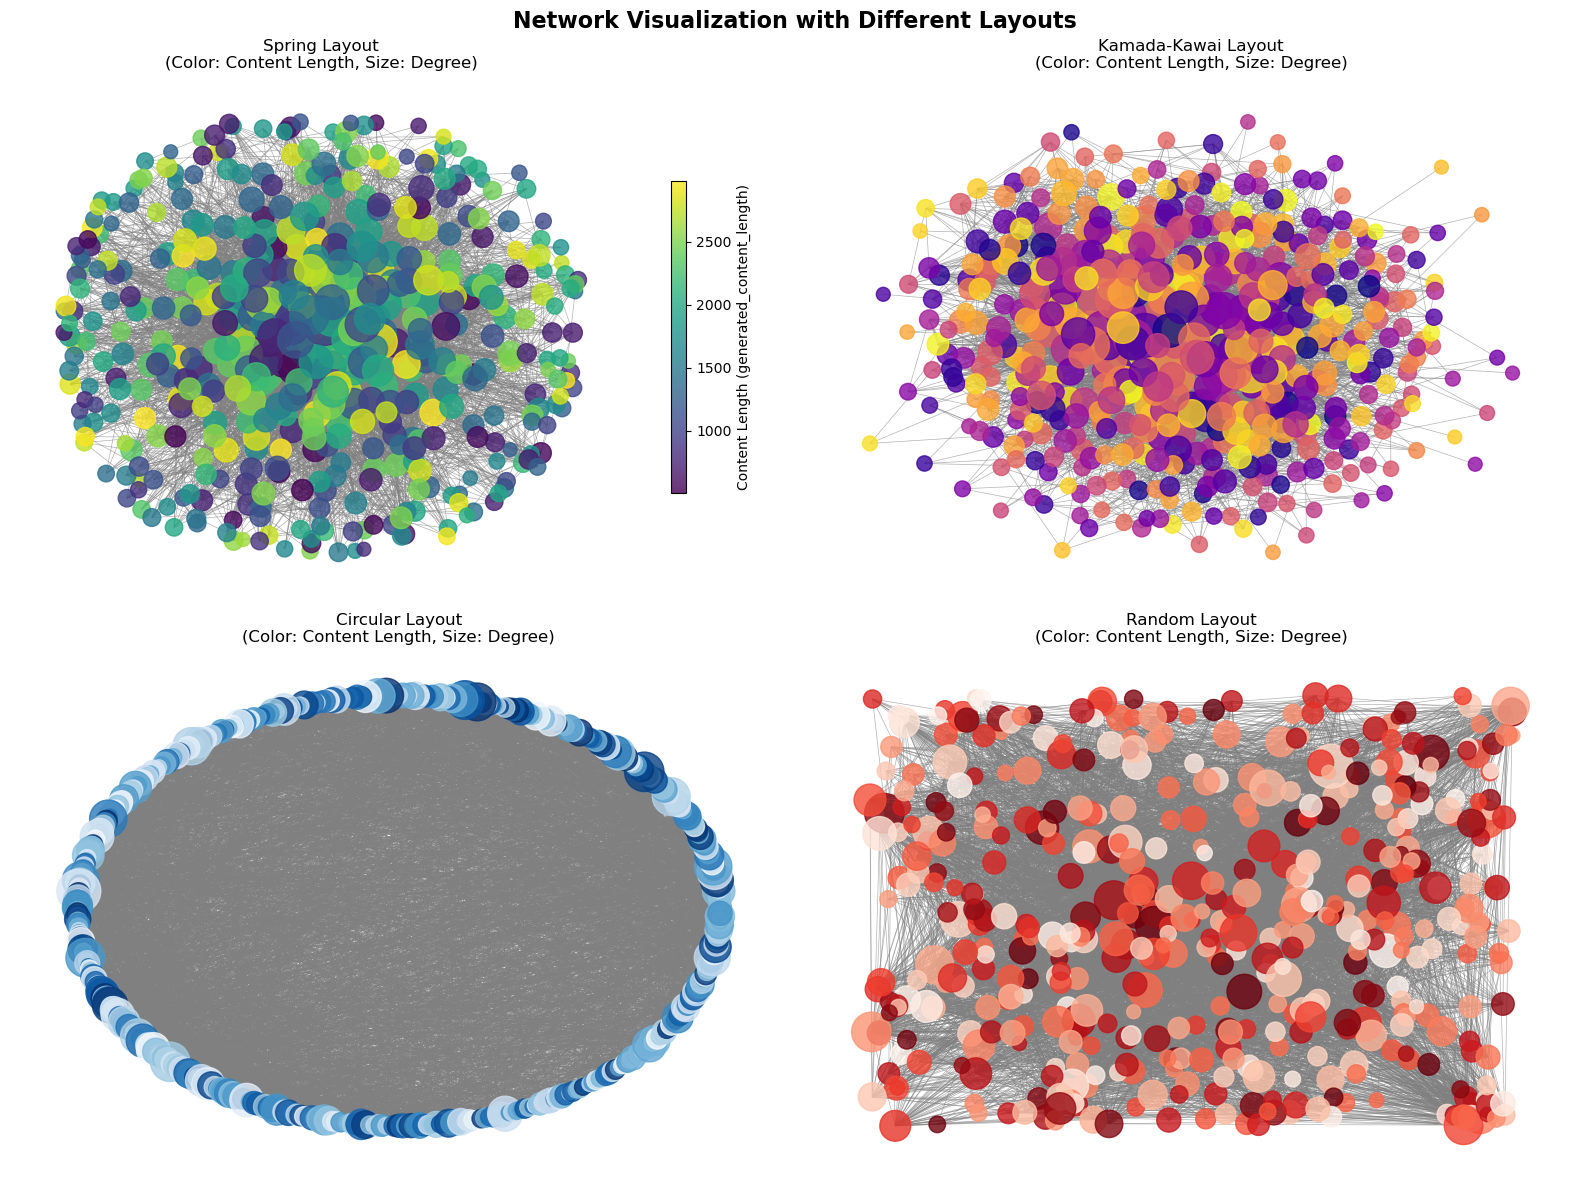


4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout


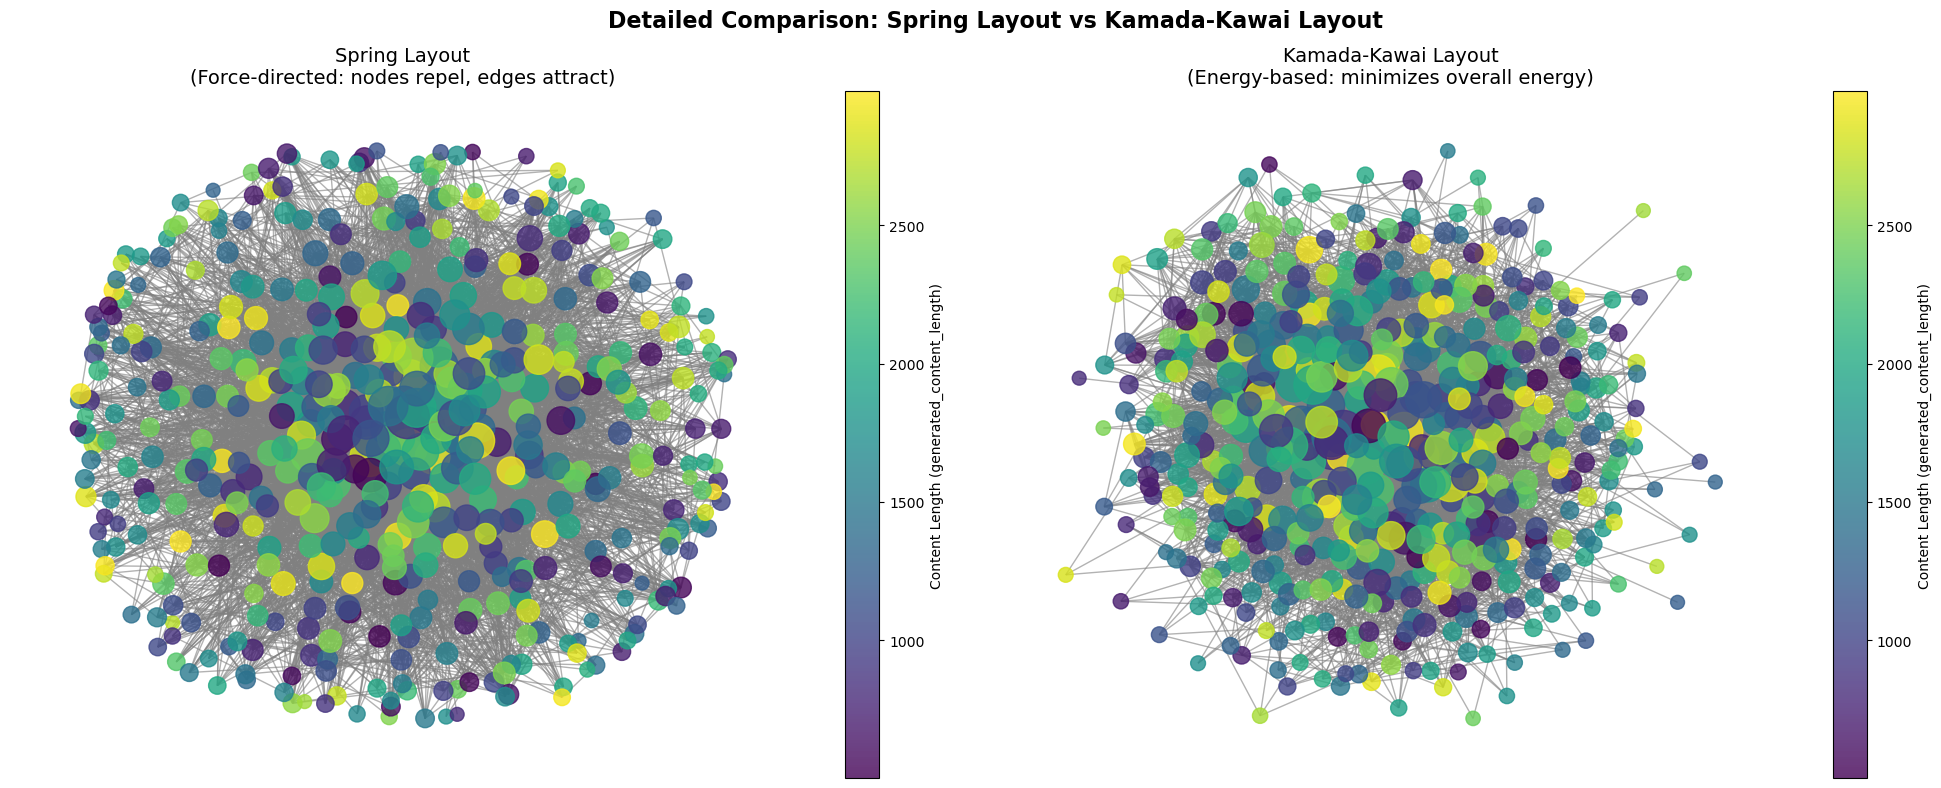


5. Creating size legend...


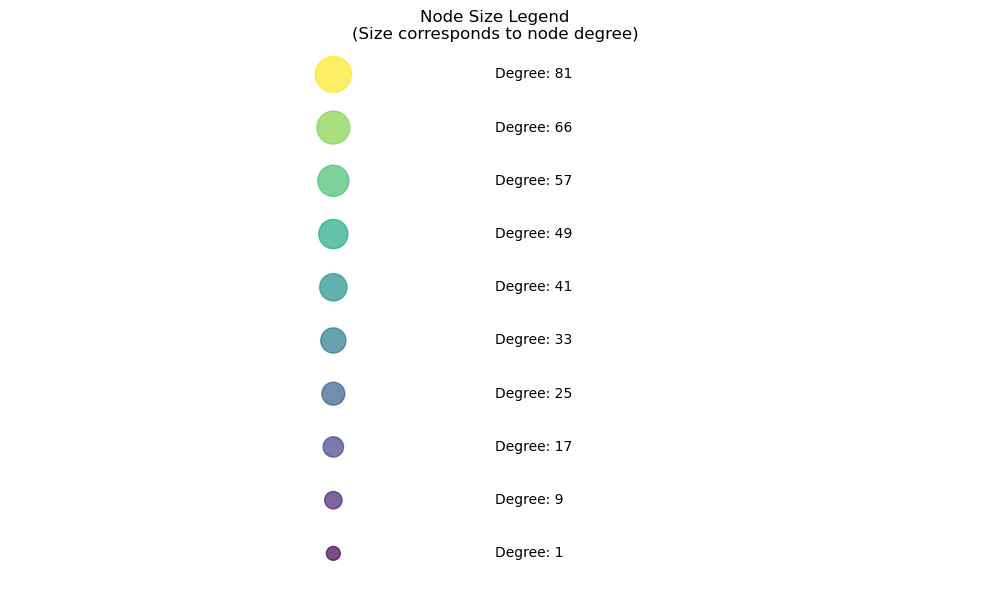


6. VISUALIZATION SUMMARY:
----------------------------------------
• Network converted from directed (7328 edges) to undirected (6025 edges)
• Node sizes scaled by degree (range: 1 - 127)
• Node colors based on 'generated_content_length' (range: 501 - 2985)
• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)

• Layout Algorithm Differences:
  - Spring Layout: Fast, good for most networks, emphasizes local structure
  - Kamada-Kawai: Slower but more stable, better for showing global structure
  - Circular: Good for showing all nodes clearly, less emphasis on connections
  - Random: Baseline comparison, no meaningful structure


In [2]:
# Create or load your graph
G_directed = nx.read_gexf("Files/artists_graph_with_stats.gexf")

# Run the main visualization
G_undirected, pos = visualize_network(G_directed)

For all the subplots, the node size shows how many connections a node has (degree), and the color shows its generated content length. Edges are drawn lightly.

For Figure 1:

- **(Top-left) Spring layout — force-directed (Fruchterman–Reingold):** This layout balances between nodes and attraction along edges pulling tightly connected groups together. Hubs occupy central positions with many spokes. 
- **(Top right) Kamada - Kawai layout - energy minimization:** Places nodes so that their distances on the plot match their distances in the network. The result is more balanced and symmetric than Spring, but clusters in the center can still look crowded.
- **(Bottom left) Circular layout, peripheral ordering:** Puts all nodes evenly around a circle. This makes every node visible and still shows who the big hubs are, but it’s harder to see communities or paths since distance on the circle doesn’t reflect network distance.
- **(Bottom right) Random layout - baseline:** Places nodes randomly. This doesn’t show any real structure but works as a baseline for comparison.

For Figure 2: 

- **Spring (left):** Emphasizes local structure. Tight clusters and hub-and-spoke patterns pop out. Great for spotting communities and gateway nodes bridging dense groups.
- **Kamada-Kawai (right):** Emphasizes global geometry. Overall shape and relative cluster spacing is more faithful to graph distances. Useful when you care about how subgroups are positioned relative to each other rather than just how cohesive each group is.

Because color and size represent different things, we can check whether long-content nodes are also the most connected. In this case, size (degree) and color (content length) don’t always match, showing that long content isn’t just tied to high connectivity.

For Figure 3:

The legend shows how node size scales with degree. Small nodes are lightly connected (eg degree ≈ 17–33), while the very large ones are hubs (≈ 66–81). In the full network, the biggest nodes have degree up to 127, acting as the main connectors

Overall, we simplified the Rock Music network by making it undirected (7328 edges -> 6025 edges). Node size shows degree (1-127), and color shows generated content length (510-2999). 
- Spring: best for seeing clusters and hubs.
- Kamada - Kawai: better for the overall geometry between groups
- Circular: ensures visibility of all nodes but doesn't show structure well
- Random: a control layout with no real information

Together, these layouts show that the network is highly connected, with several hubs and overlapping communities. Content length varies across the graph instead of being to the most connected nodes.

# References